In [1]:
import Pkg;
Pkg.add("Plots");
Pkg.add("DataFrames")
using Plots
using DataFrames

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


To begin, we are given $u(x) = \sin(x)$ and $\bar{x} = 2$. We know the exact solution $u'(x) = \cos(x)$ as well.

In [2]:
u(x) = sin(x);
u′(x) = cos(x);
x̄ = 2;

Let's define our different finite difference approximations. They will be paramaterized by $h$:

In [3]:
D₋u(h) = x̄ -> (u(x̄ + h) - u(x̄)) / h;
D₊u(h) = x̄ -> (u(x̄) - u(x̄ - h)) / h;
D₀u(h) = x̄ -> (u(x̄ + h) - u(x̄ - h)) / 2h;
D₃u(h) = x̄ -> (2u(x̄ + h) + 3u(x̄) - 6u(x̄ - h) + u(x̄ - 2h)) / 6h;

We can plot our approximations from $0$ to $2\pi$ along with $\cos(x)$, and see that they are in agreement:

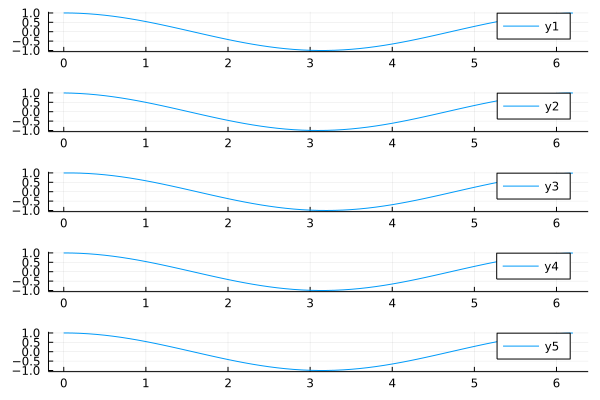

In [4]:
x = 0:.1:2π;
y = [cos.(x) D₋u(.1).(x) D₊u(.1).(x) D₀u(.1).(x) D₃u(.1).(x)];

plot(x, y, layout = (5, 1))

We have expressions to estimate the error of our approximations. They are written in terms of higher order derivatives of $\sin(x)$, which we know.

In [5]:
u′′(x) = -sin(x);
u′′′(x) = -cos(x);
u⁴(x) = sin(x);

D₊u_err(h) =  1/2 * h * u′′(x̄) + 1/6 * h^2 * u′′′(x̄);
D₋u_err(h) = -1/2 * h * u′′(x̄) + 1/6 * h^2 * u′′′(x̄);
D₀u_err(h) =  1/6 * h^2 * u′′′(x̄);
D₃u_err(h) = 1/12 * h^3 * u⁴(x̄);

Now we can construct a table of error estimates for various values of $h$:

In [6]:
h = [.1, .05, .01, .005, .001];

DataFrame("h" => h,
    "D₋u(x̄)" => D₋u_err.(h),
    "D₊u(x̄)" => D₊u_err.(h),
    "D₀u(x̄)" => D₀u_err.(h),
    "D₃u(x̄)" => D₃u_err.(h))

,h,D₋u(x̄),D₊u(x̄),D₀u(x̄),D₃u(x̄)
,Float64,Float64,Float64,Float64,Float64
1,0.1,0.0461584,-0.0447713,0.000693578,7.57748e-5
2,0.05,0.0229058,-0.022559,0.000173395,9.47185e-6
3,0.01,0.00455342,-0.00453955,6.93578e-6,7.57748e-8
4,0.005,0.00227498,-0.00227151,1.73395e-6,9.47185e-9
5,0.001,0.000454718,-0.000454579,6.93578e-8,7.57748e-11


When we plot the errors on a log-log scale, we see lines with a slope proportional to the order of the approximation. The positive and negative first order approximations overlap here, so just the positive one is included.

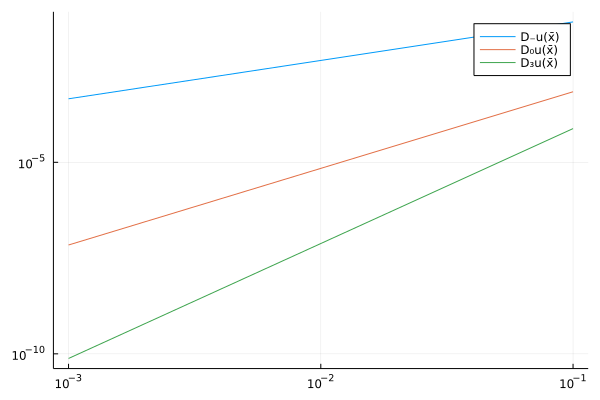

In [9]:
x = .001:.001:.1;
y = [D₋u_err.(x) D₀u_err.(x) D₃u_err.(x)];
labels = ["D₋u(x̄)" "D₀u(x̄)" "D₃u(x̄)"];
plot(x, y, xaxis=:log, yaxis=:log, label=labels)